In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

subjects=[25,27]
bands=[-1,0,1,2] 
sessions=list(range(1,3))
spaces=['electrodeSpace','fontSpace']
band_dic={-1: 'noFilter', 0:'alpha',1:'beta',2:'gamma'} 
fmt_grph = 'png'
cmapcolours = ['blue','green','orange','red']
dimensions=['zero','one']
feat_vect_names=['Landscapes','Silhouettes','Descriptors','Bottleneck']
names=[]
for band in band_dic.values():
    names.append(band+'1')
    names.append(band+'2')

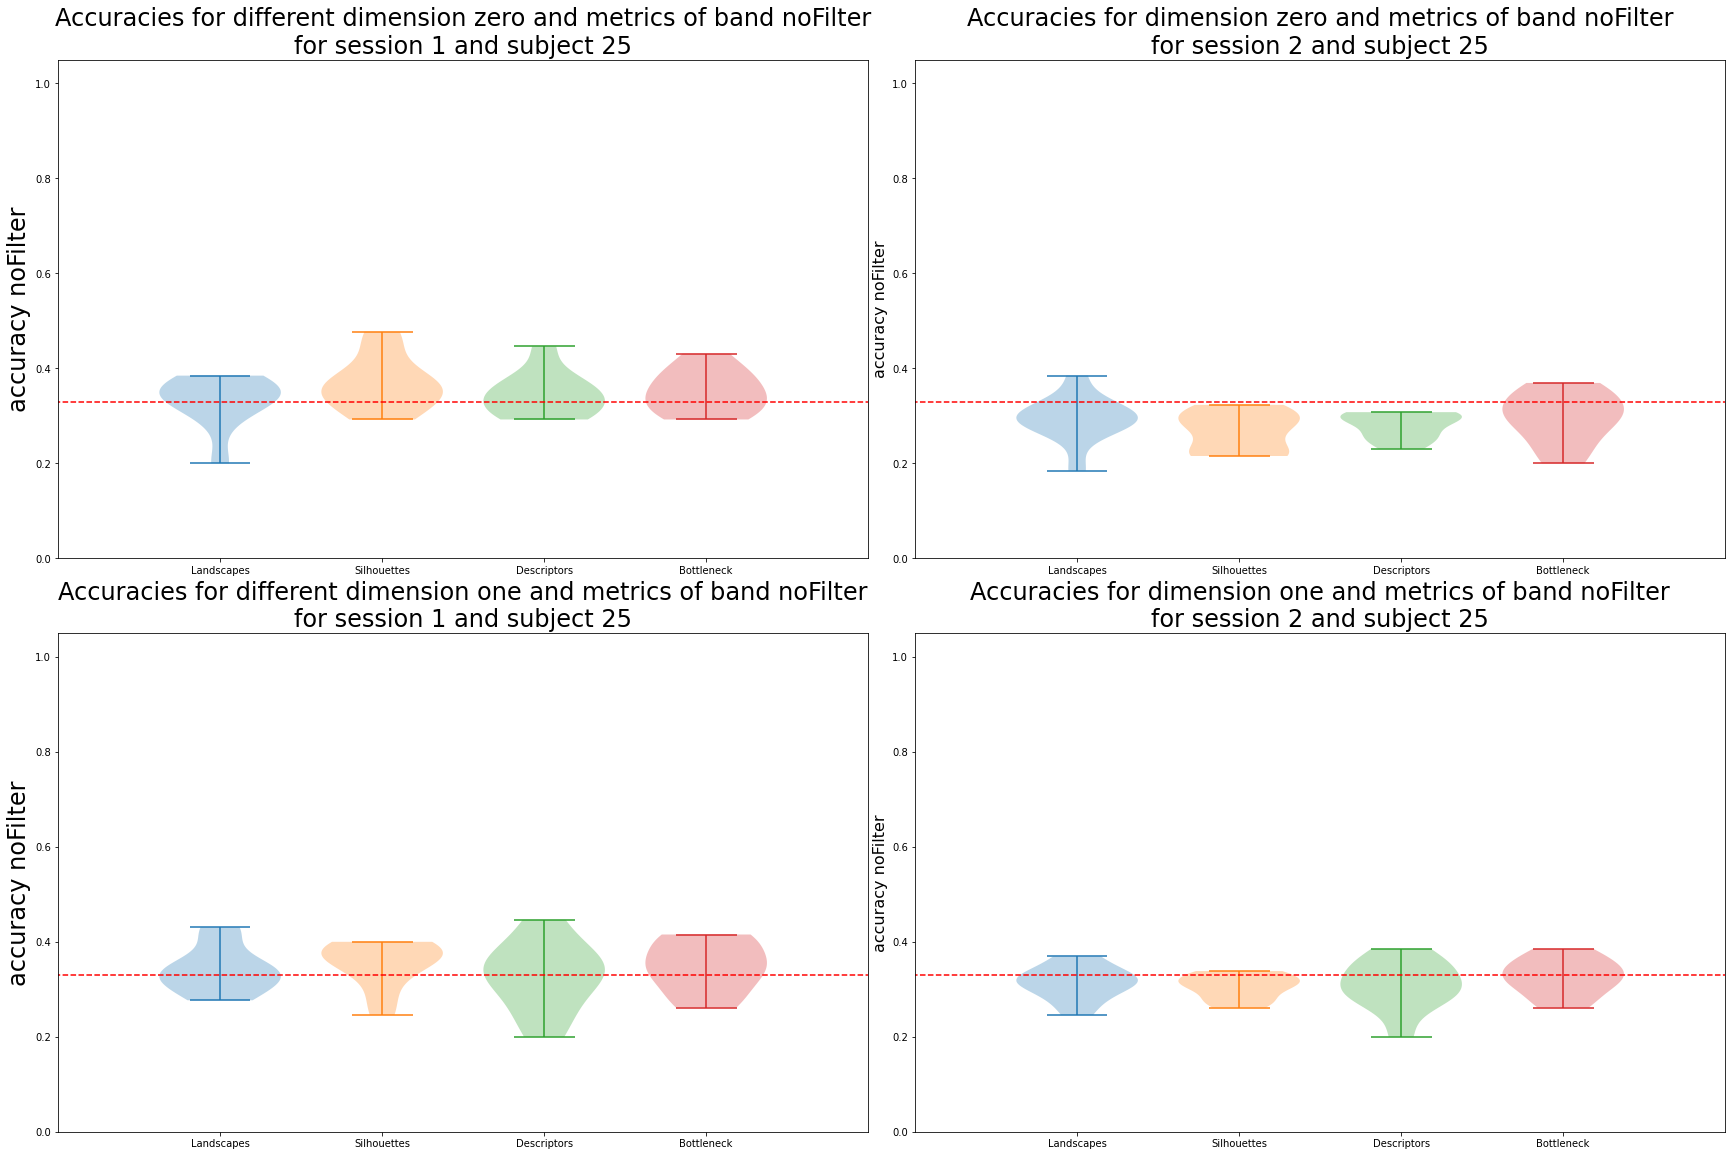

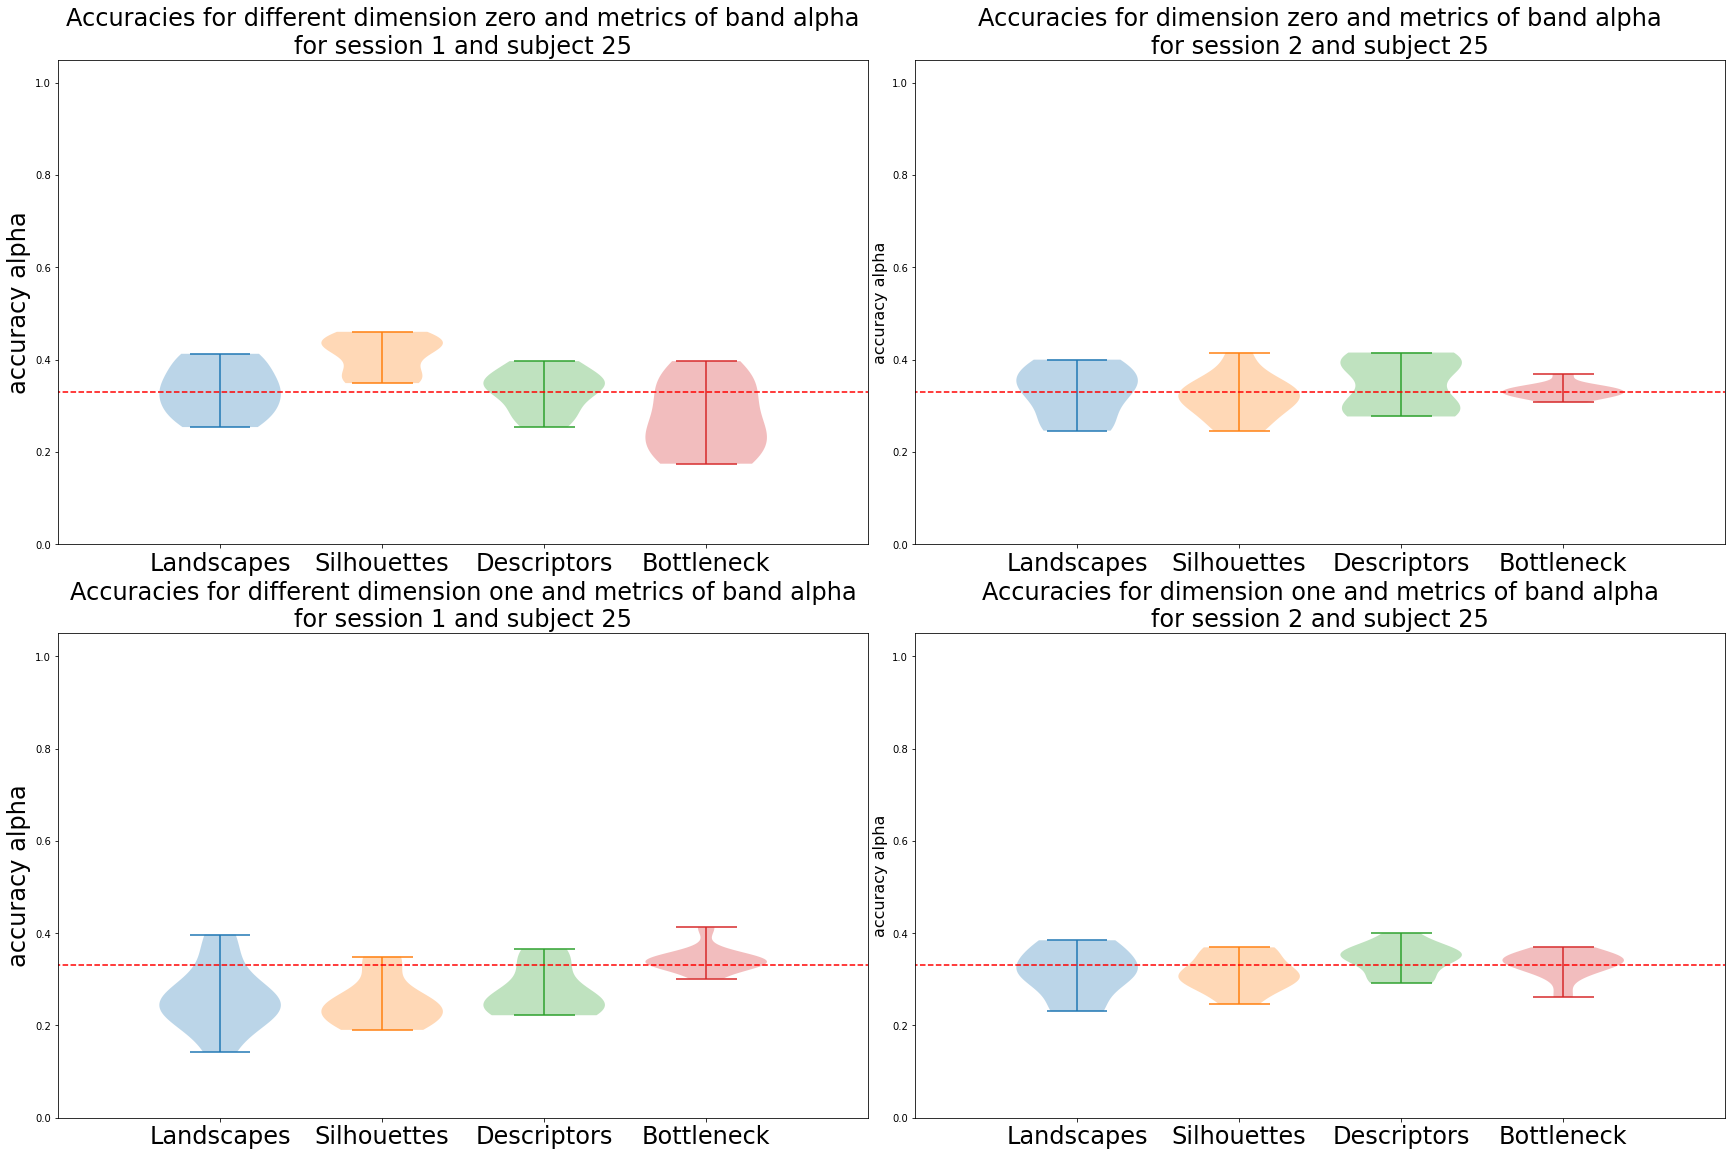

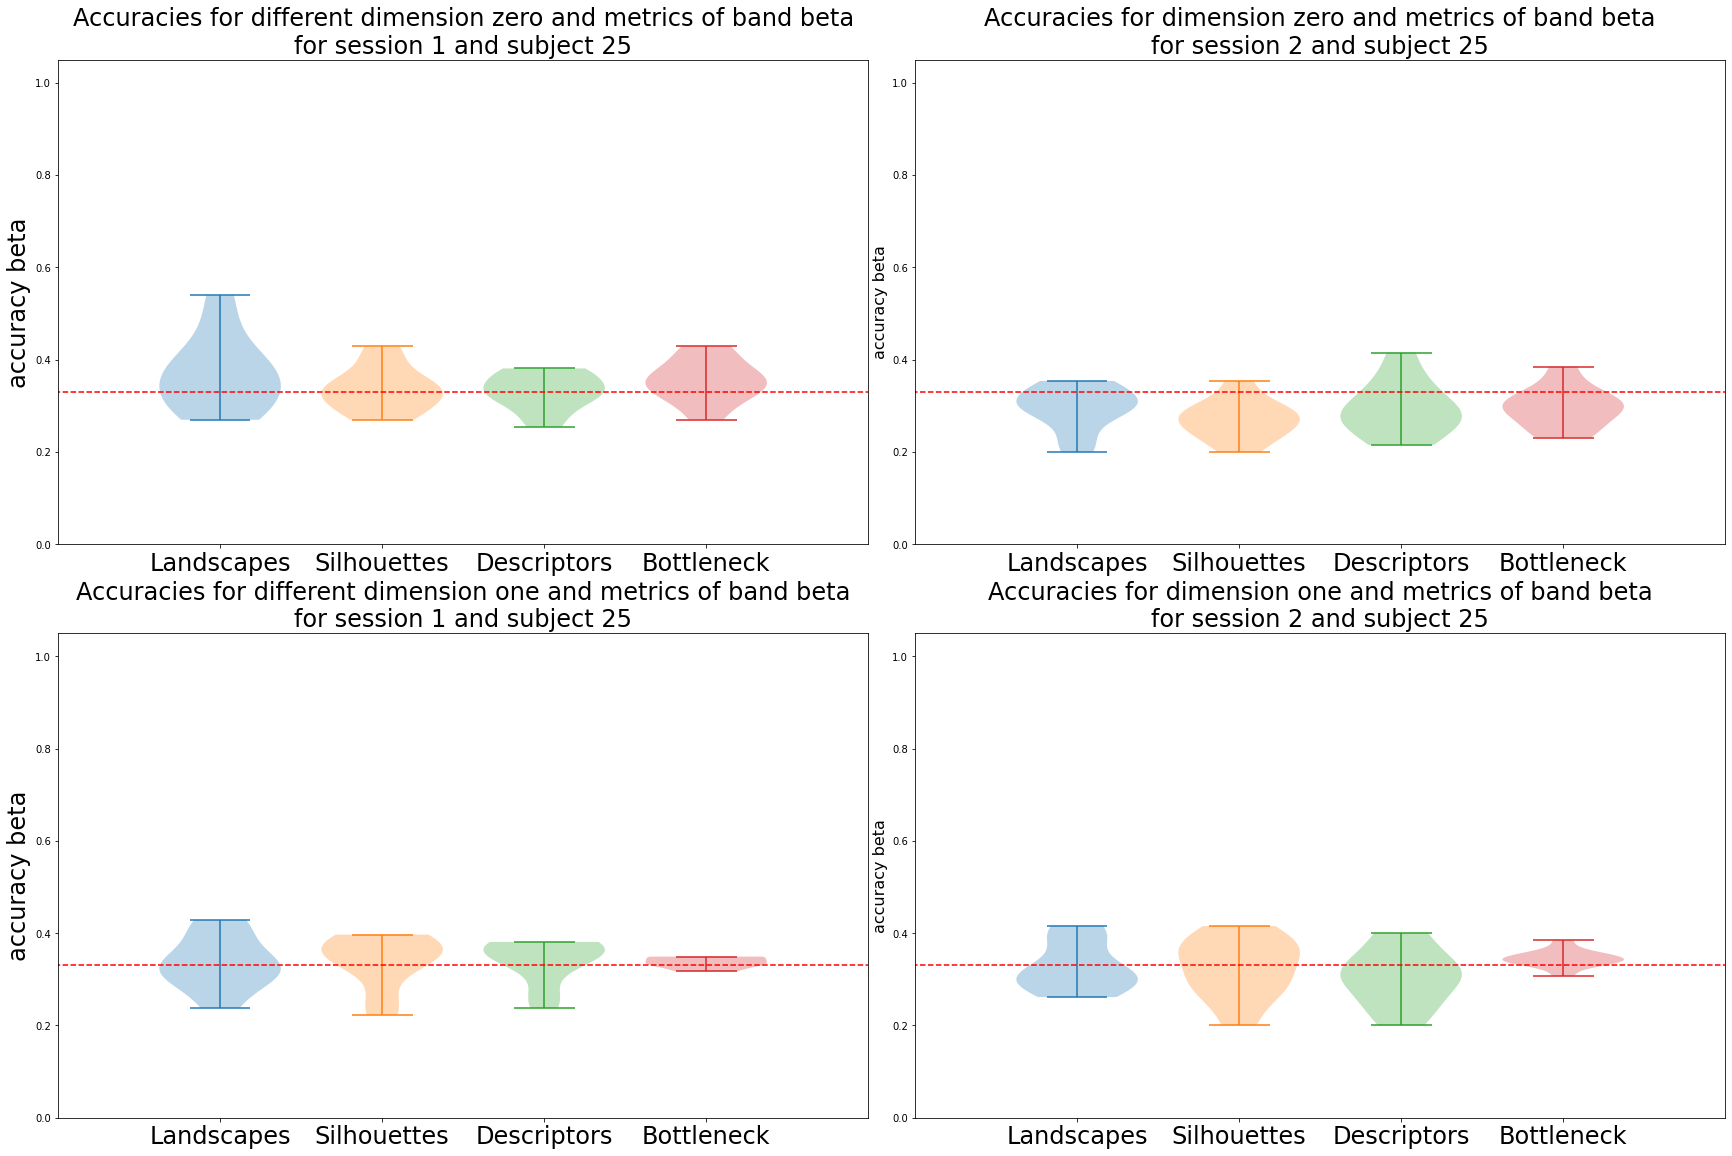

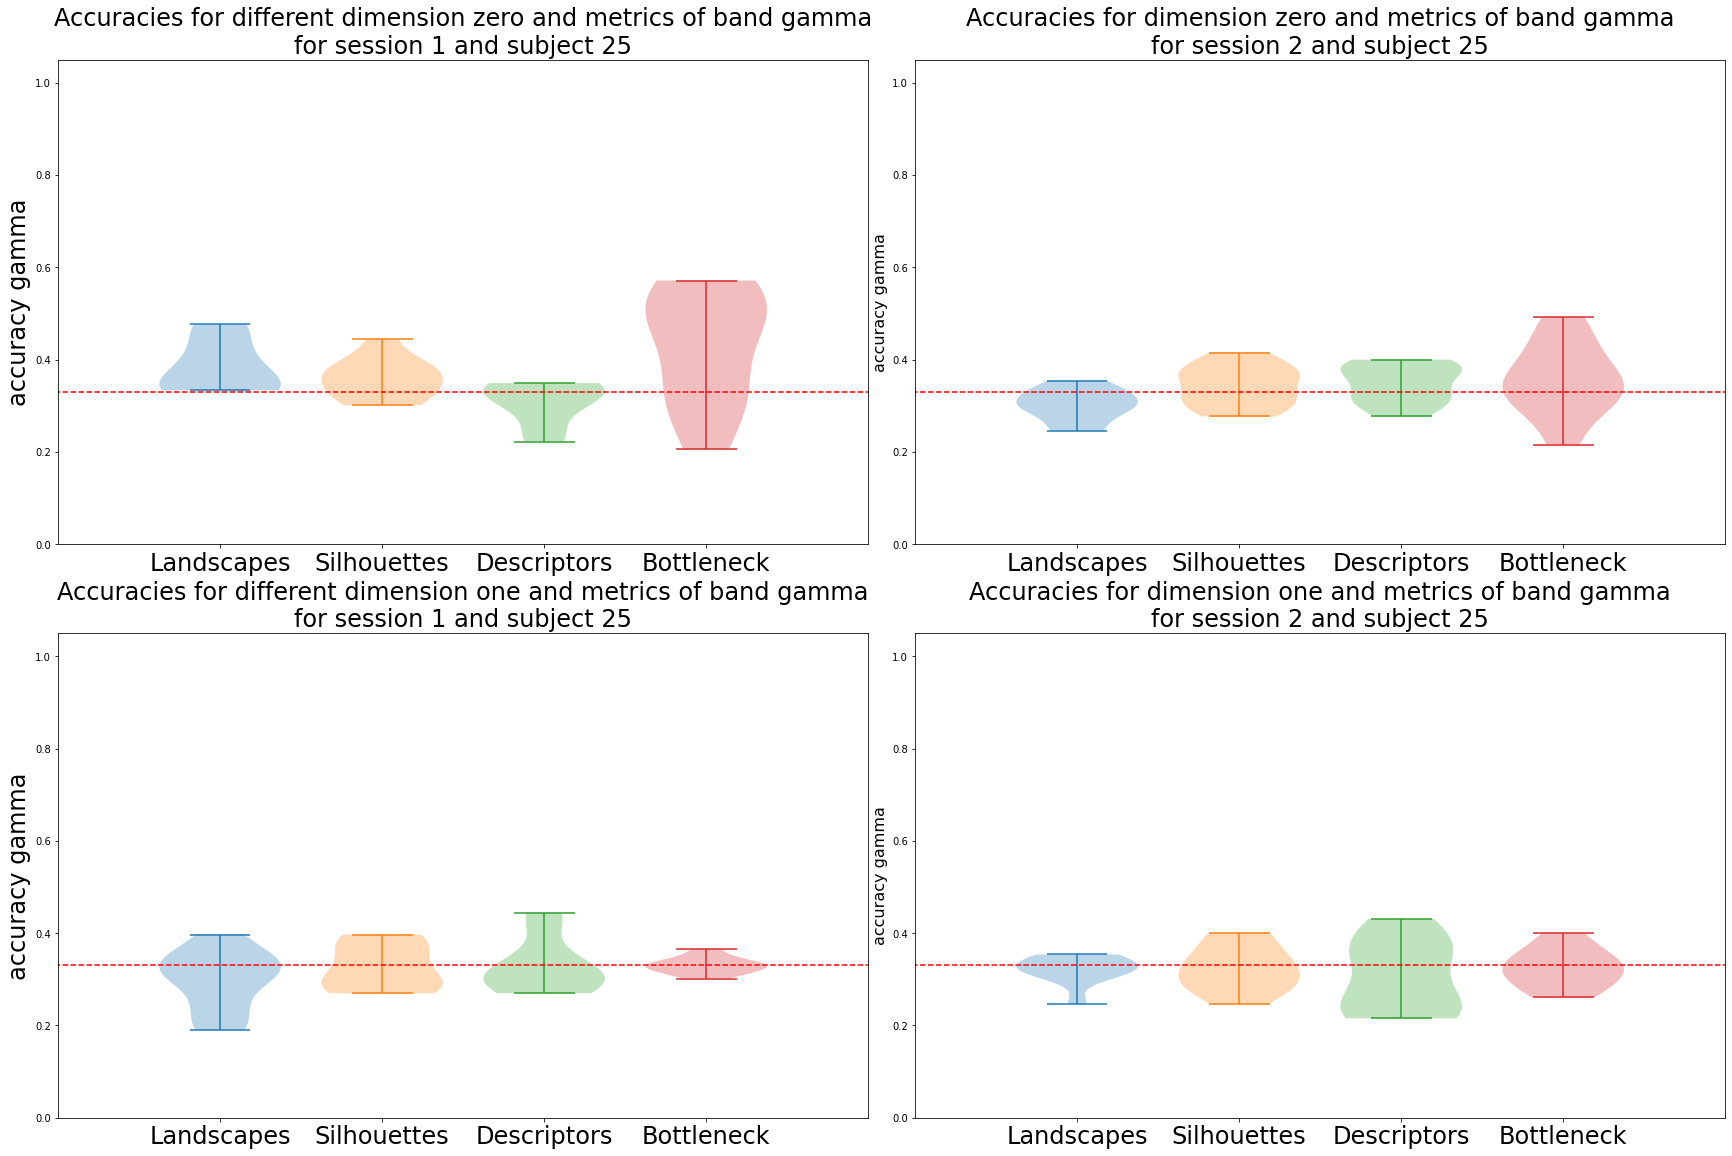

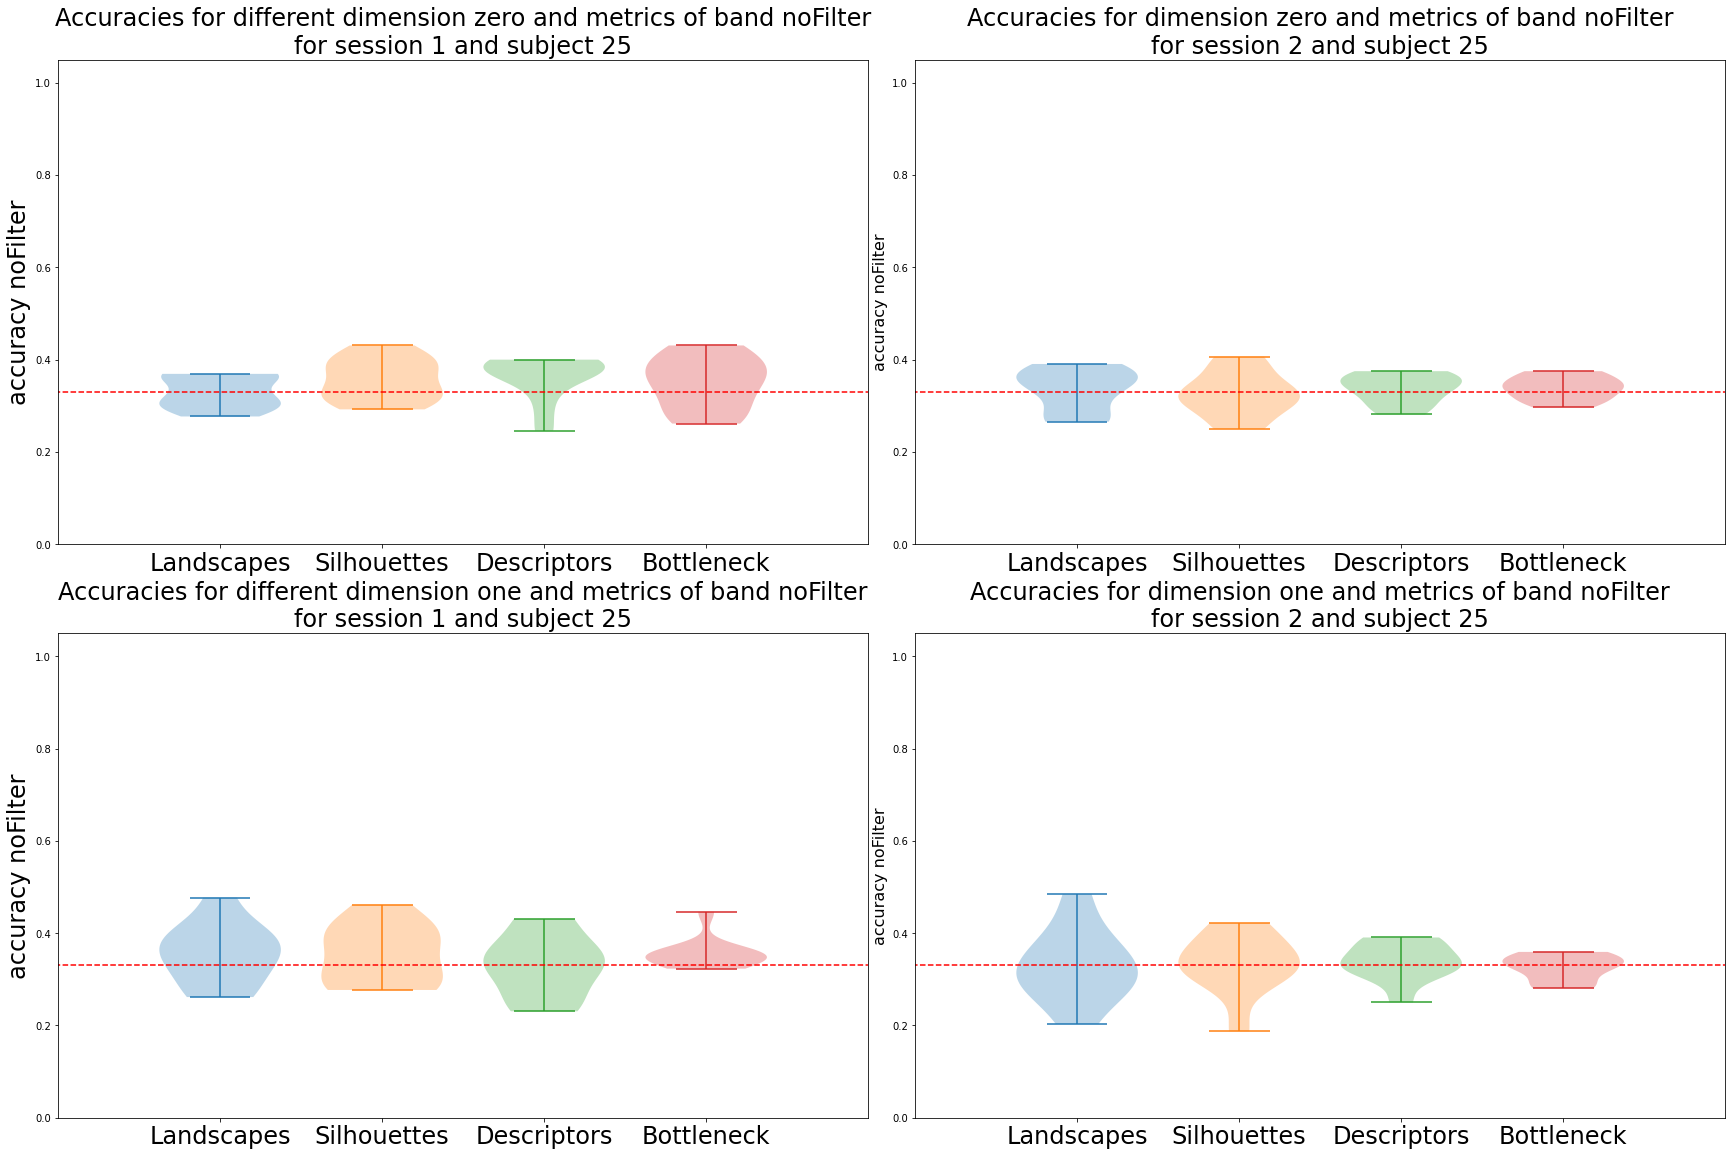

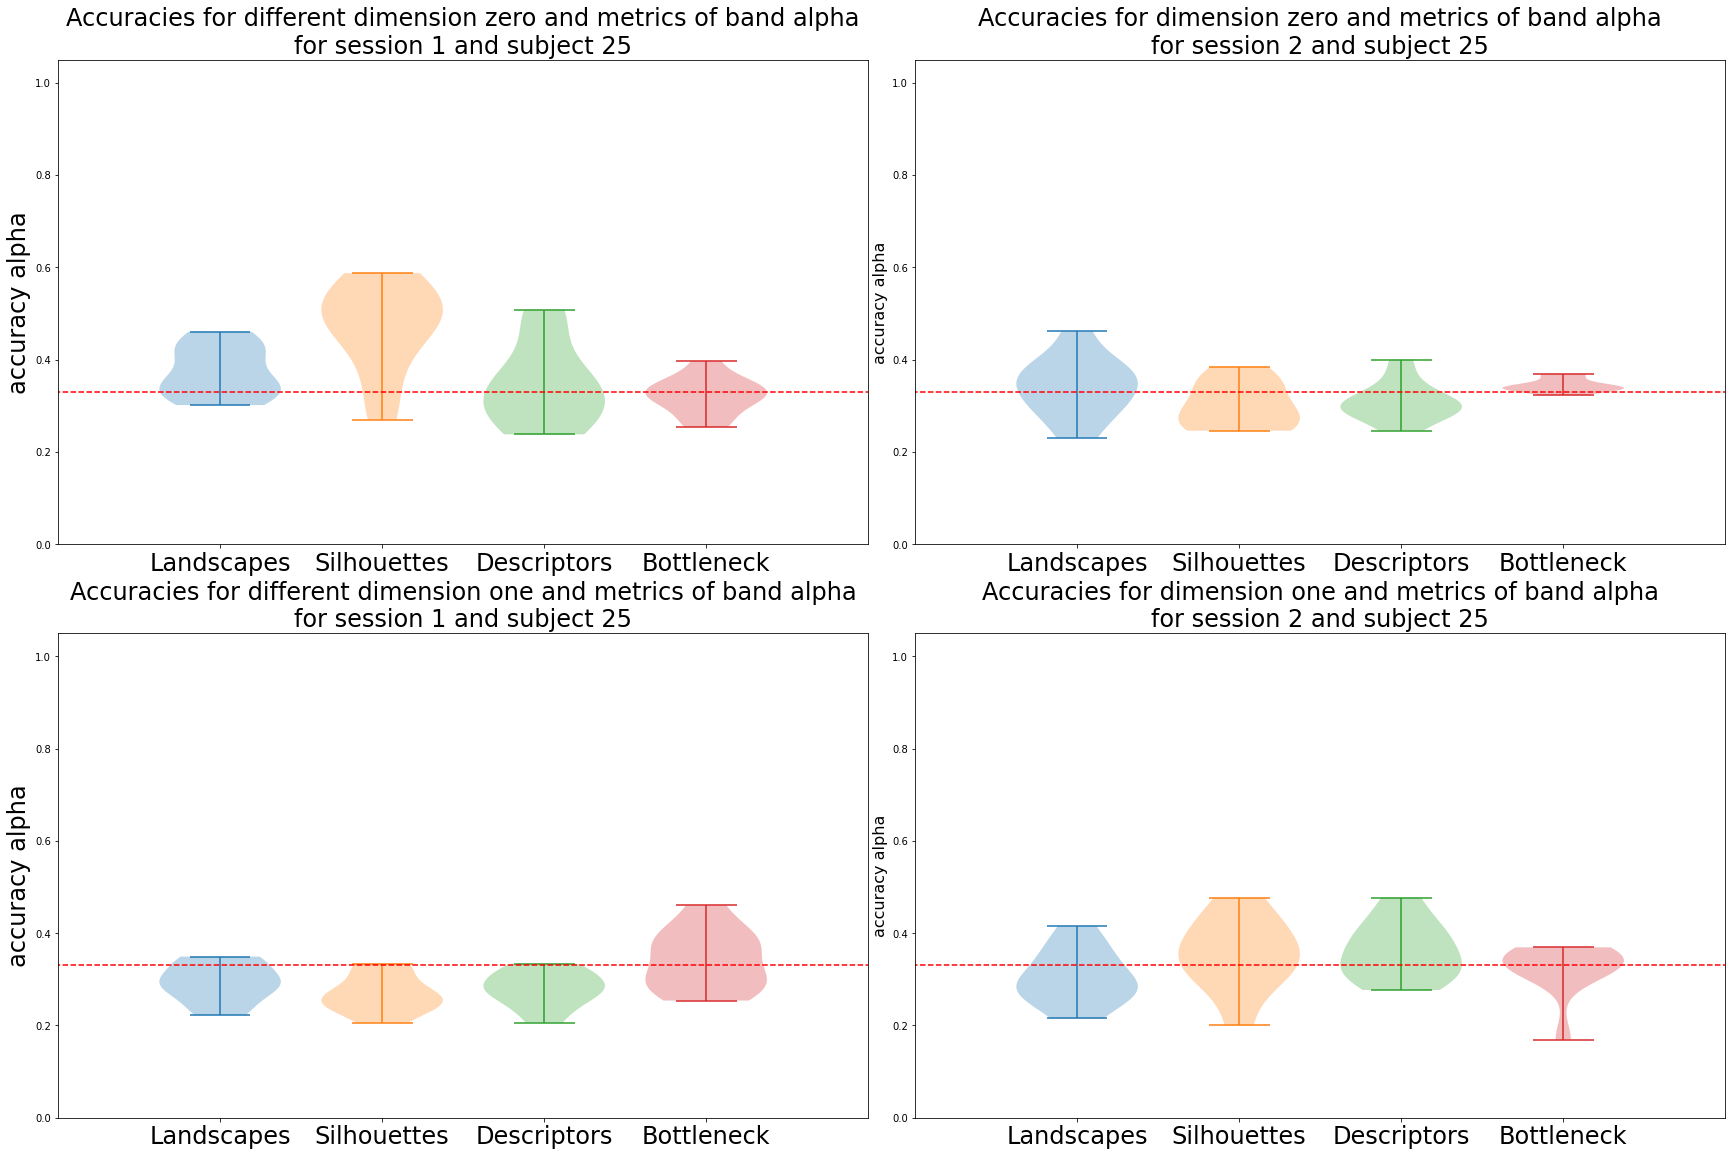

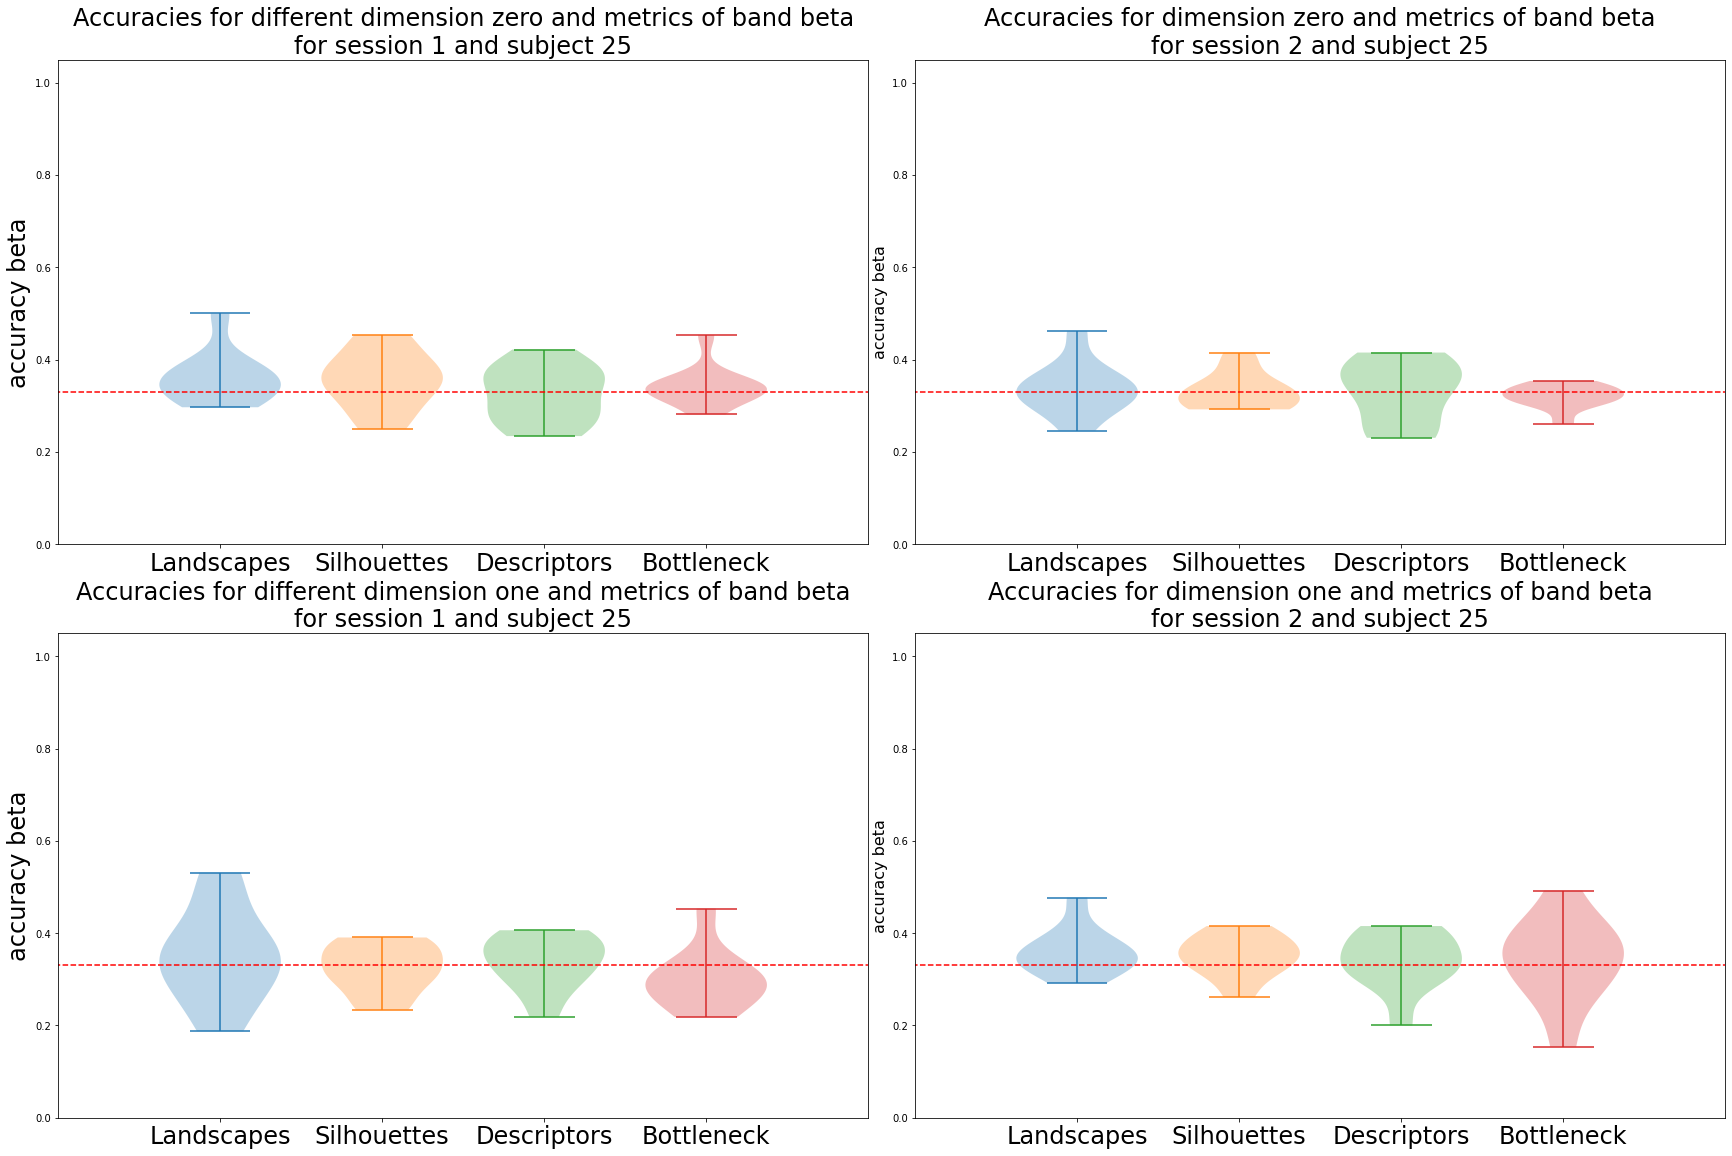

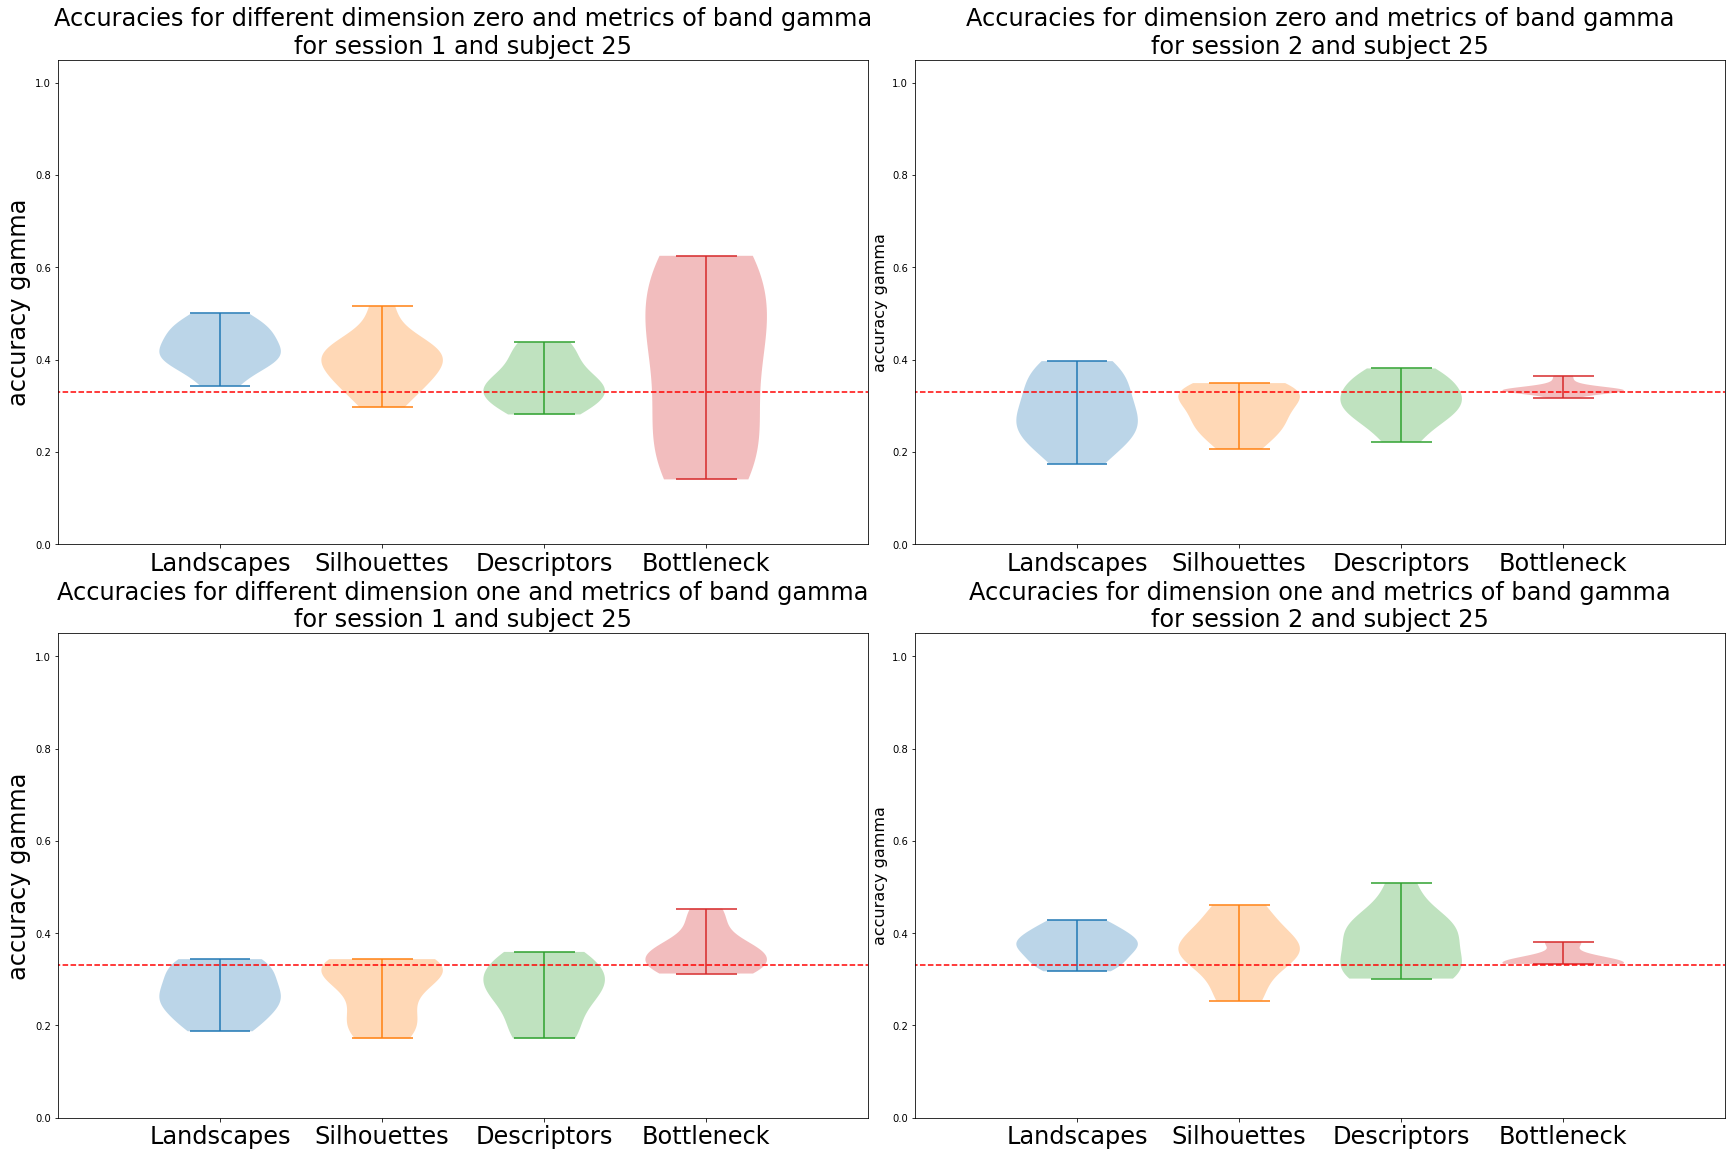

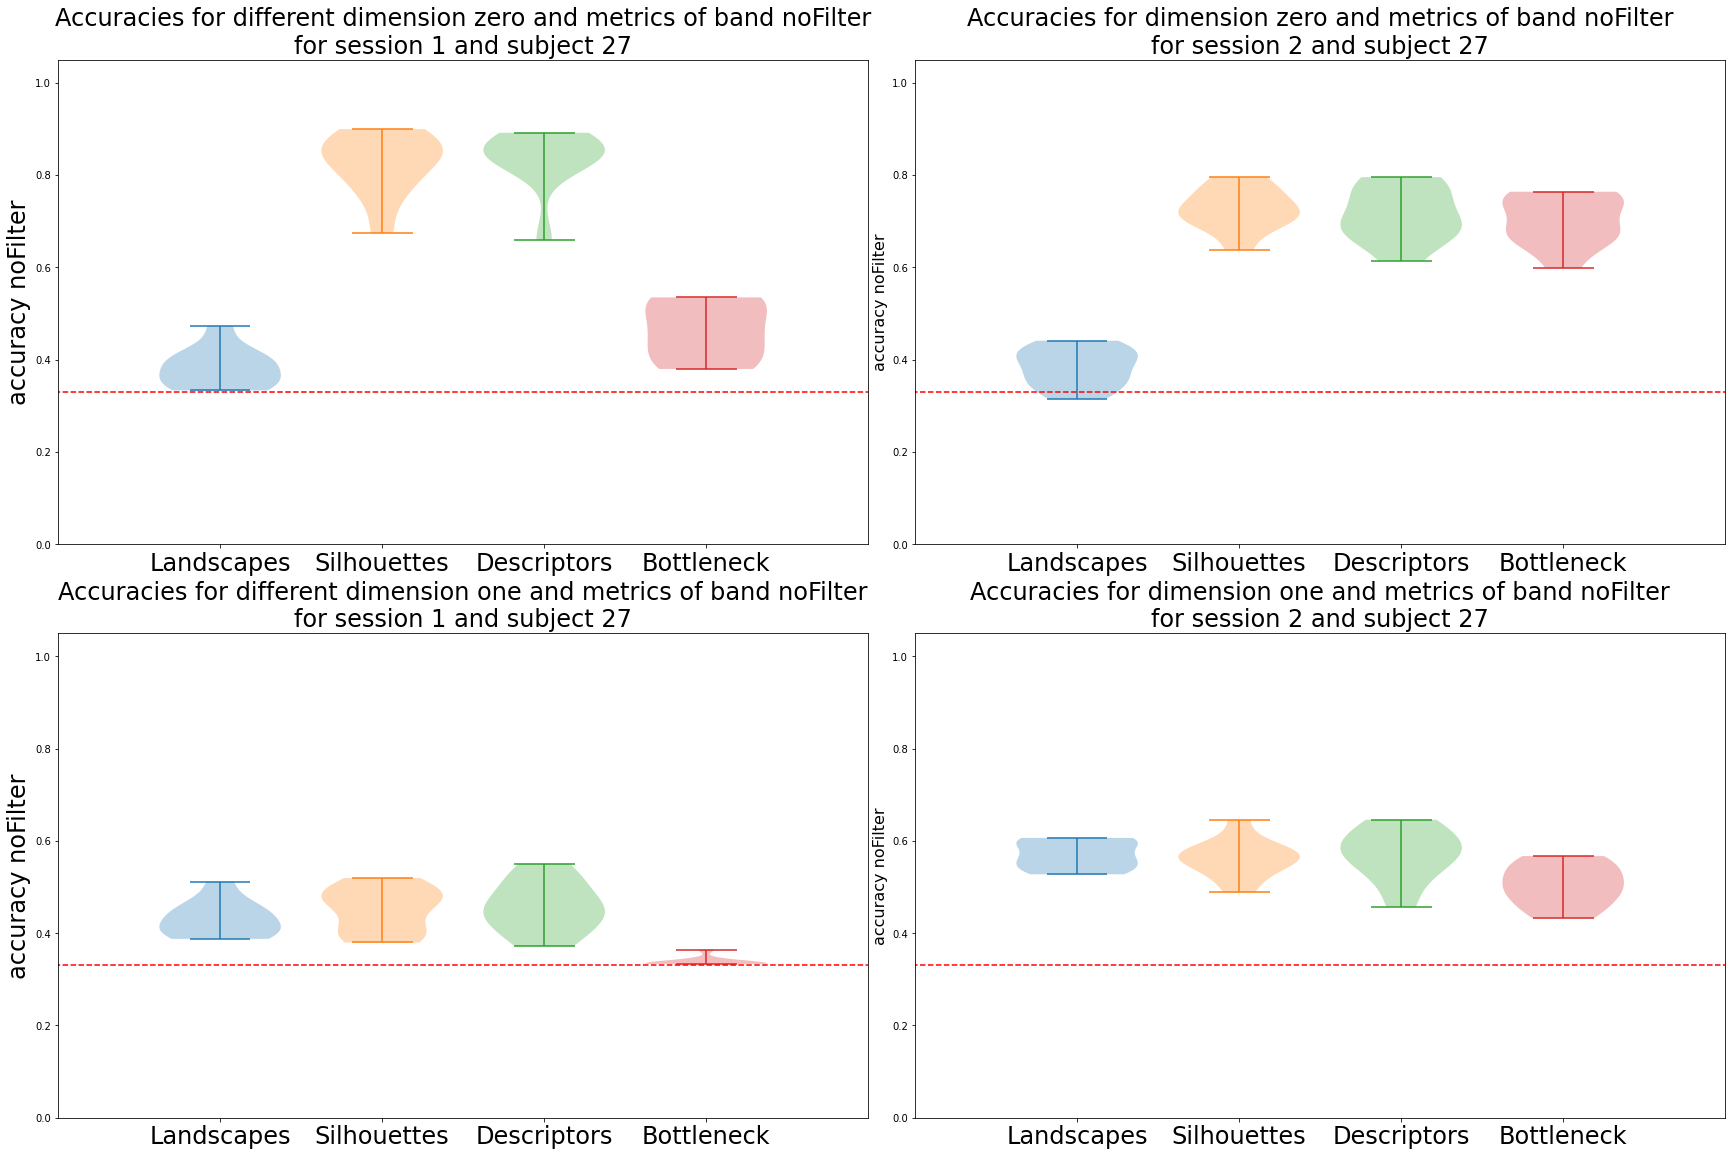

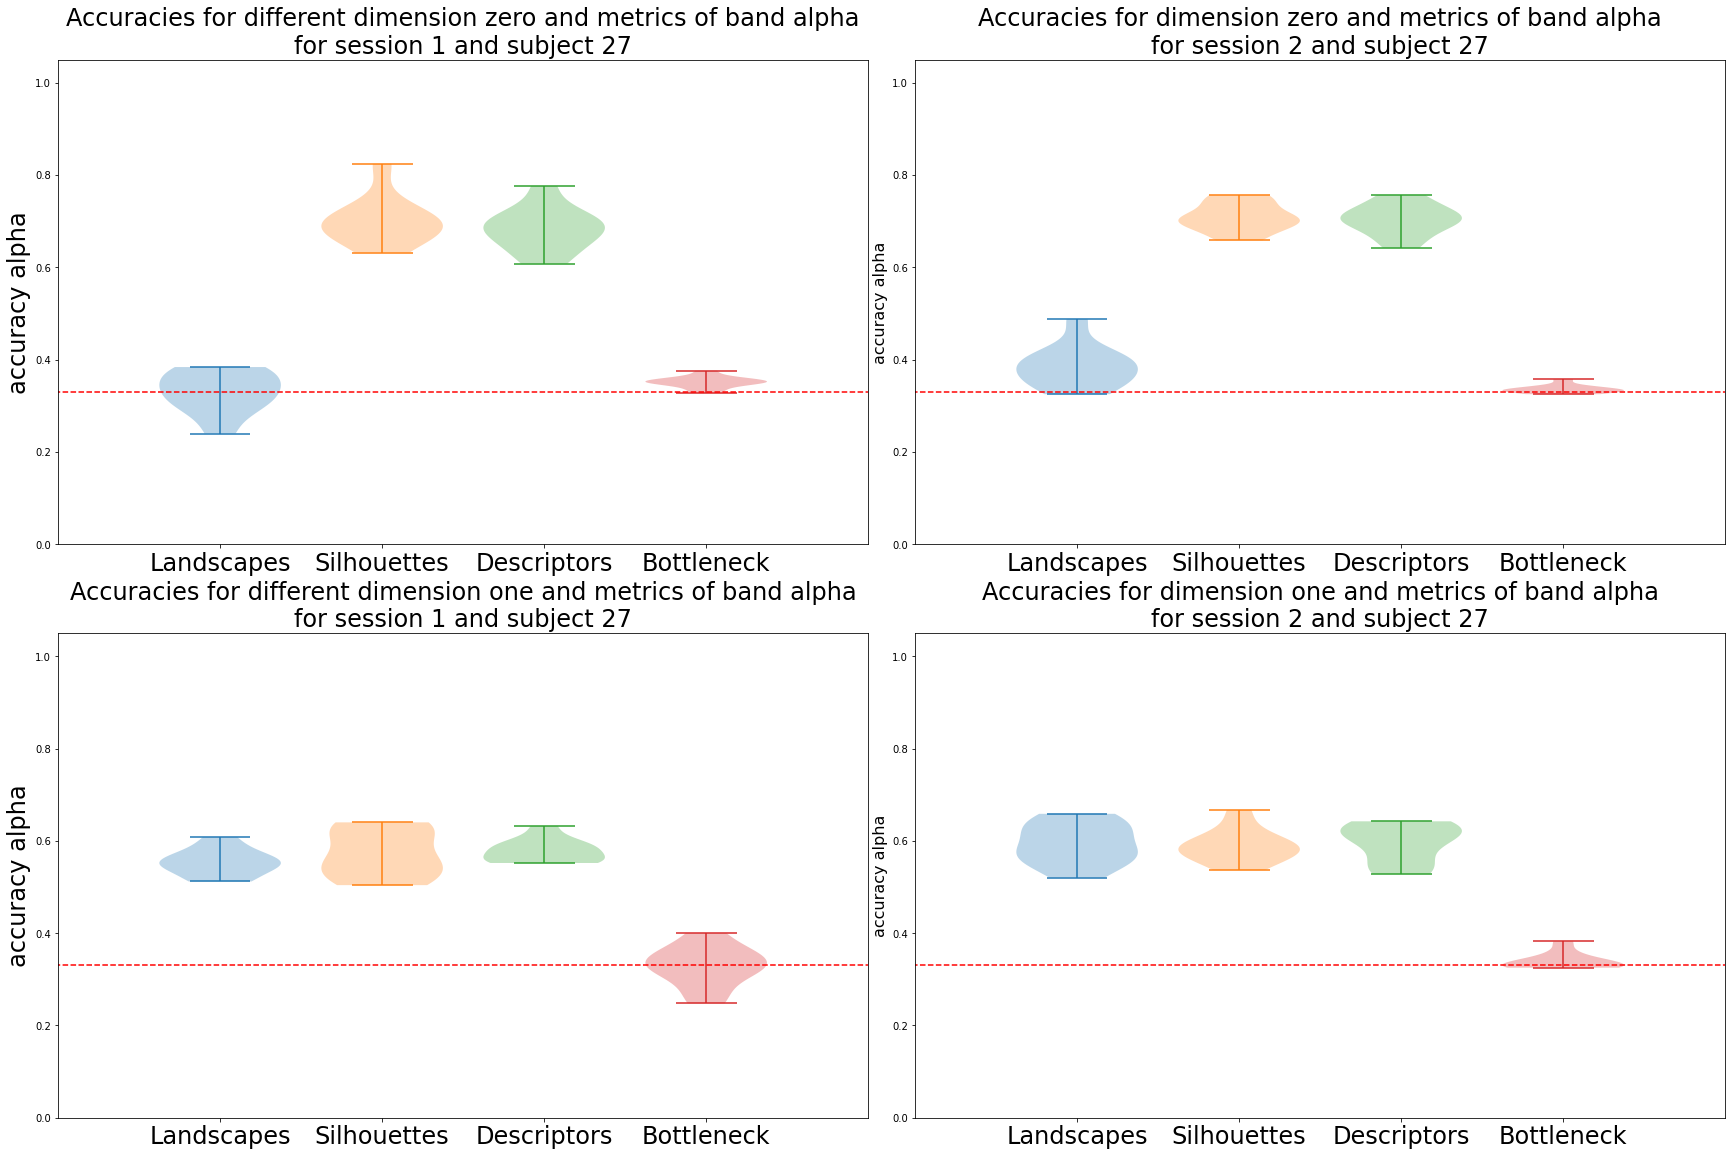

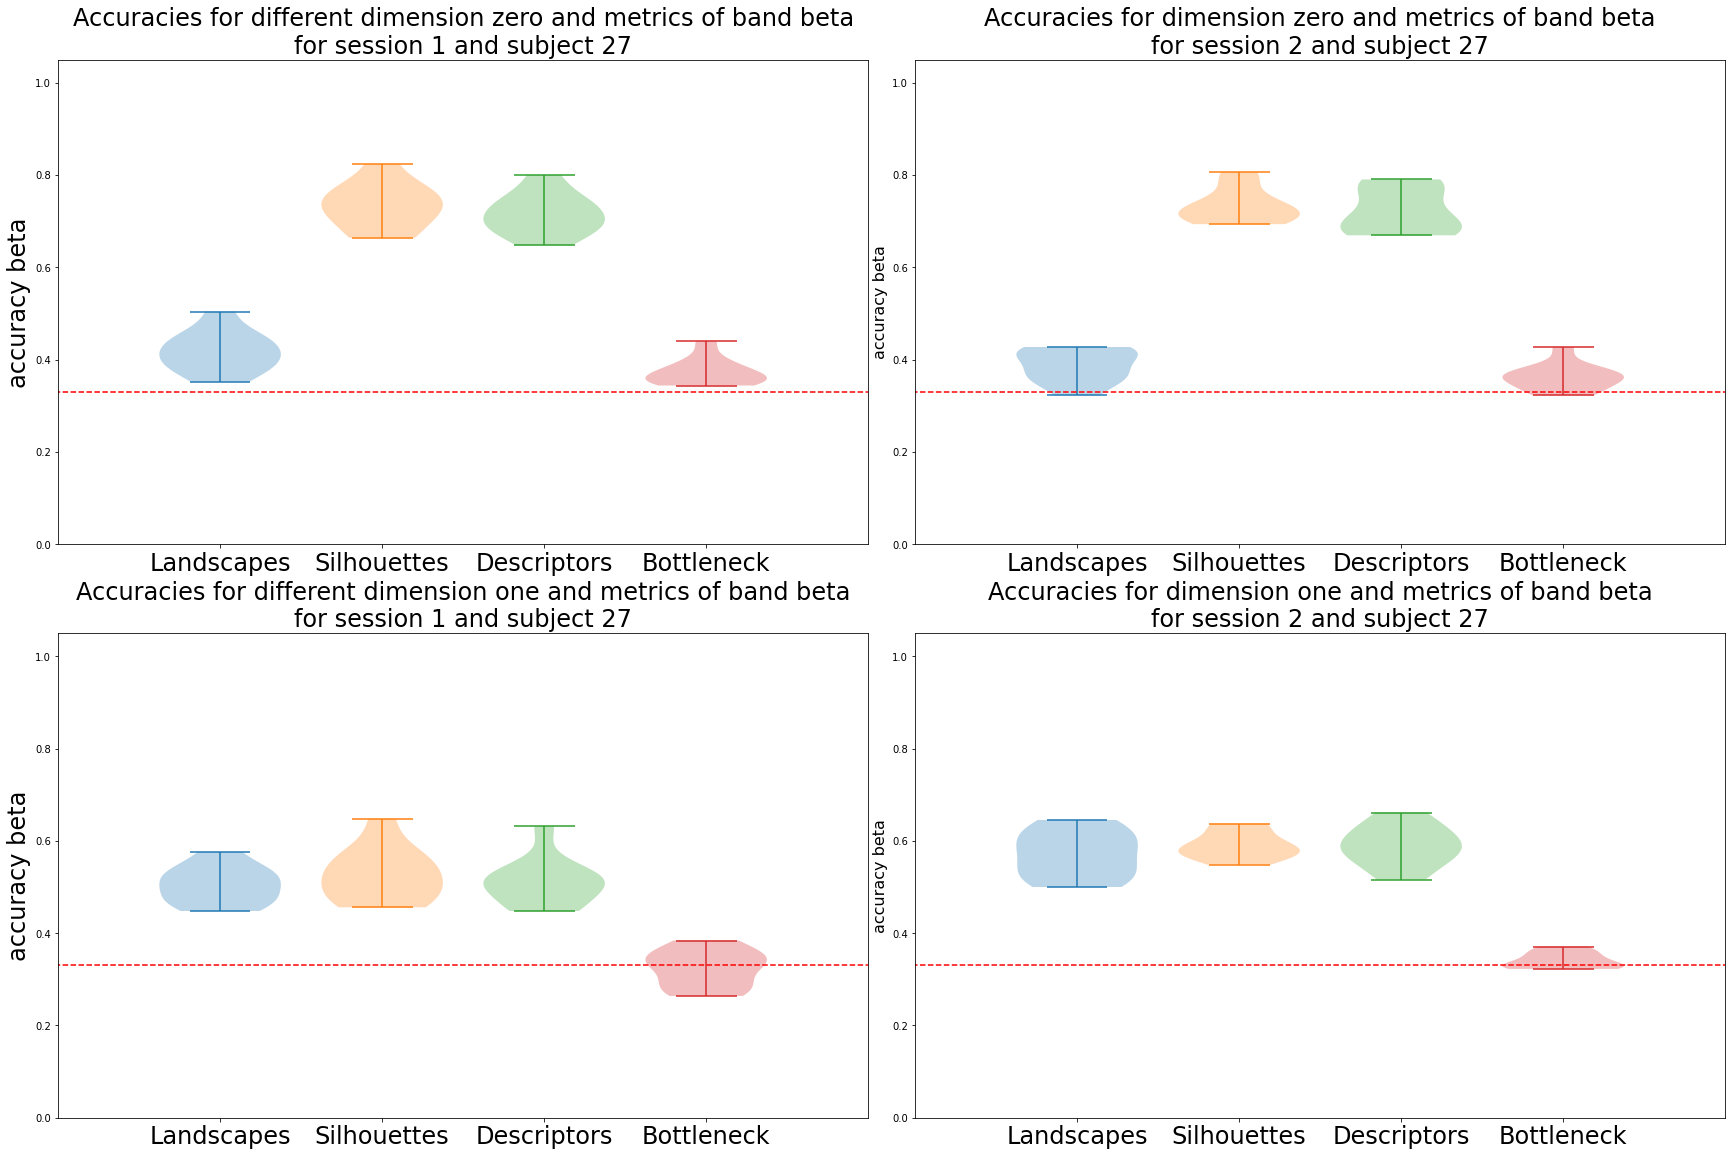

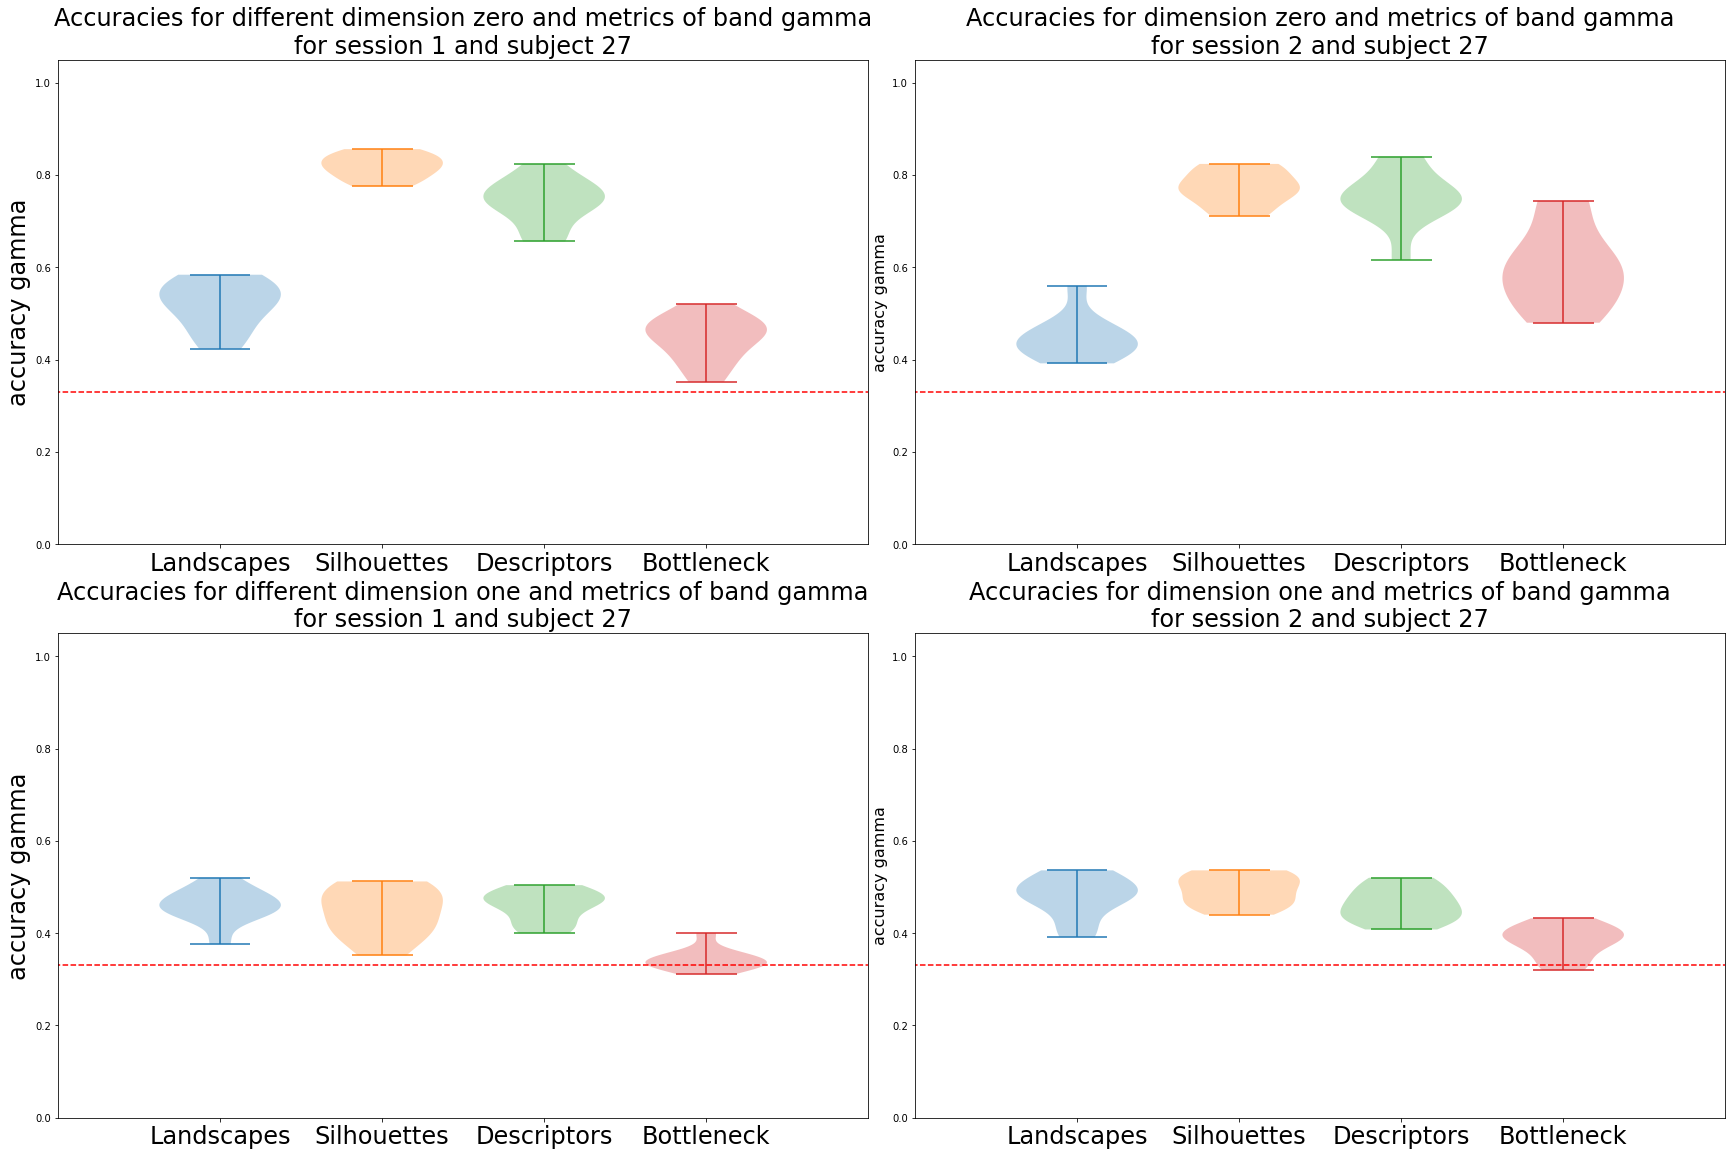

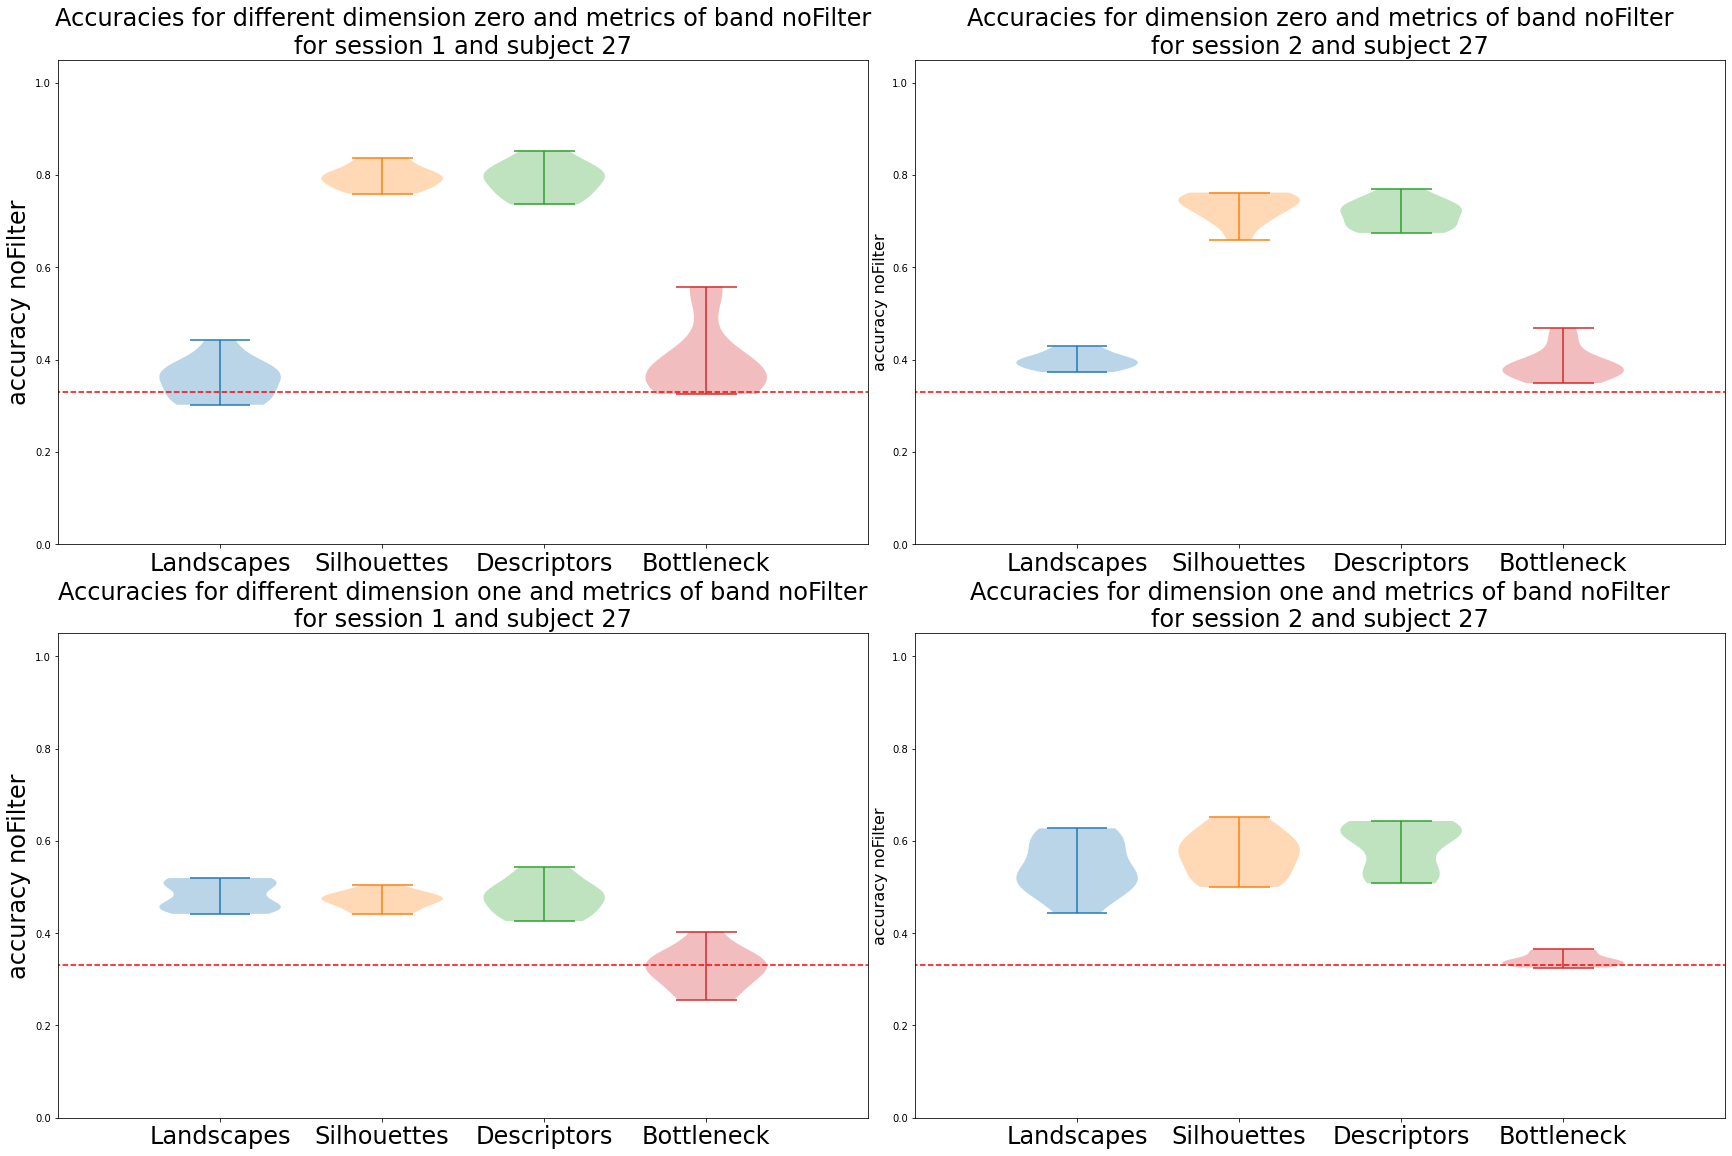

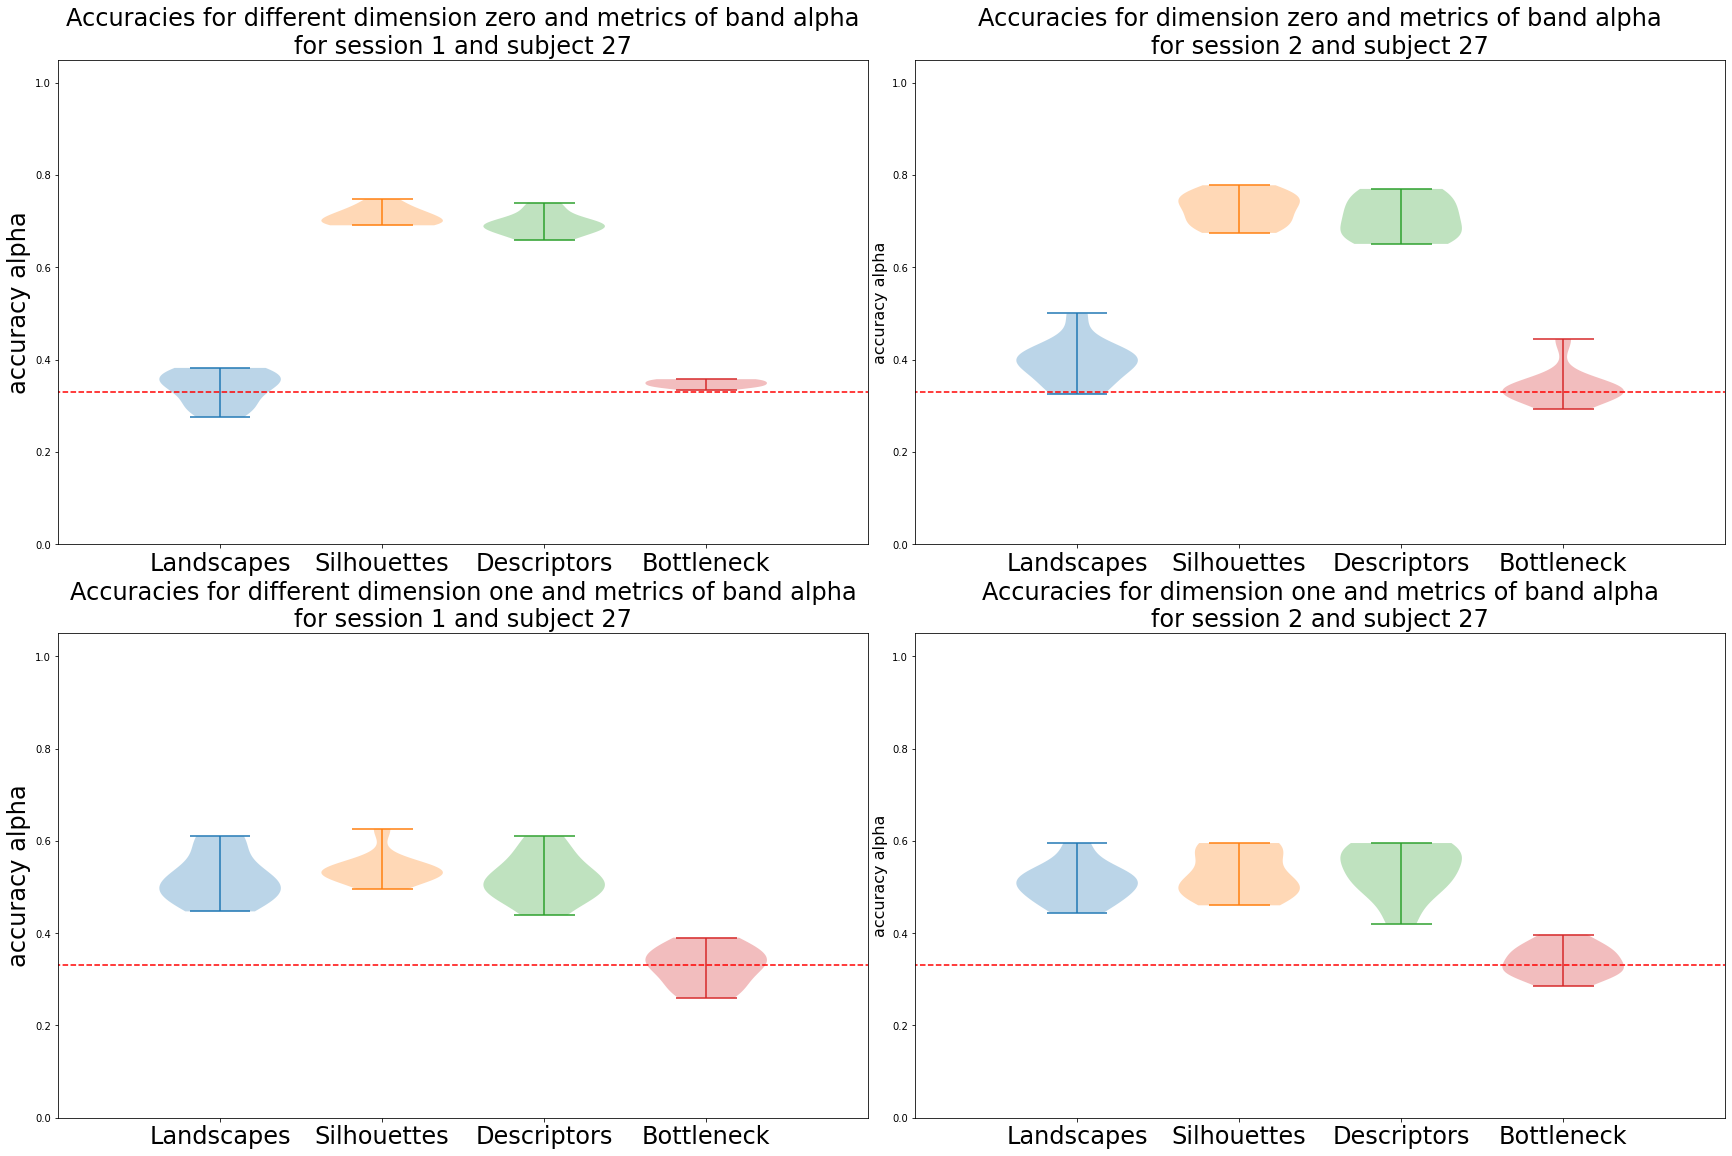

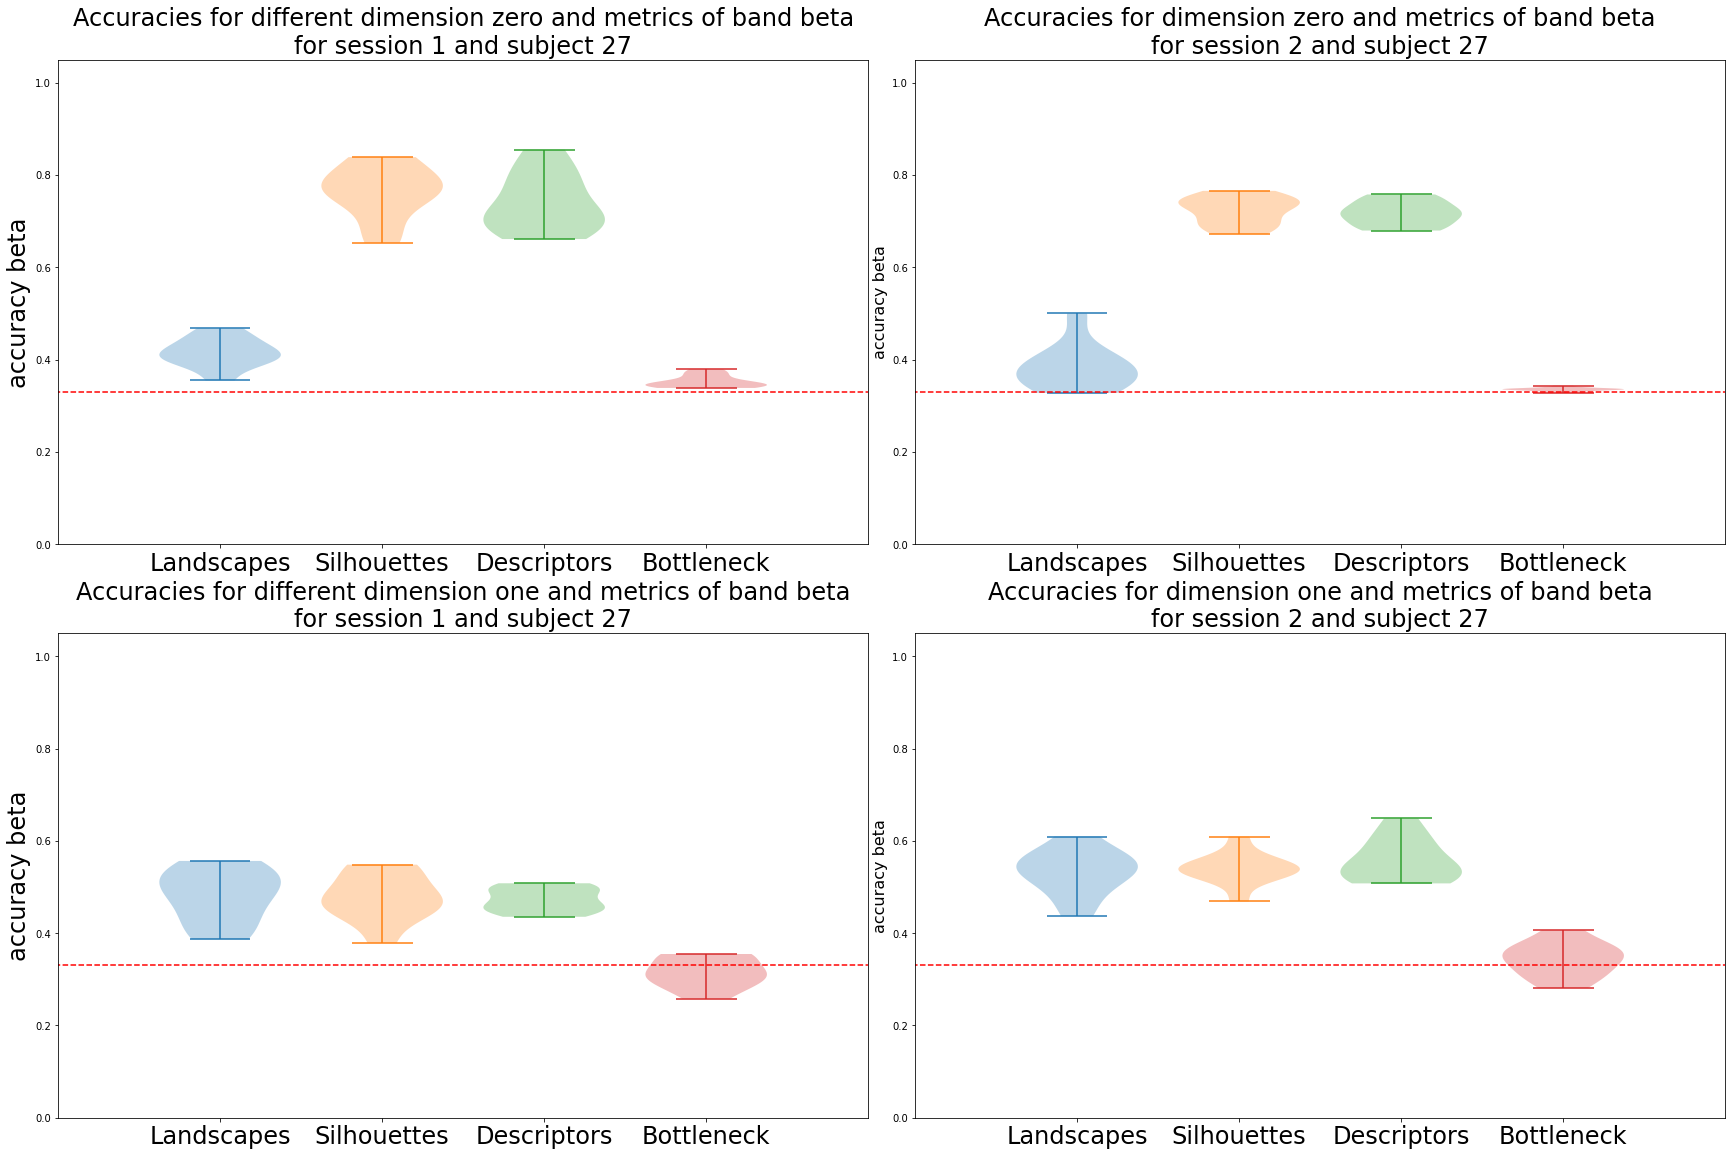

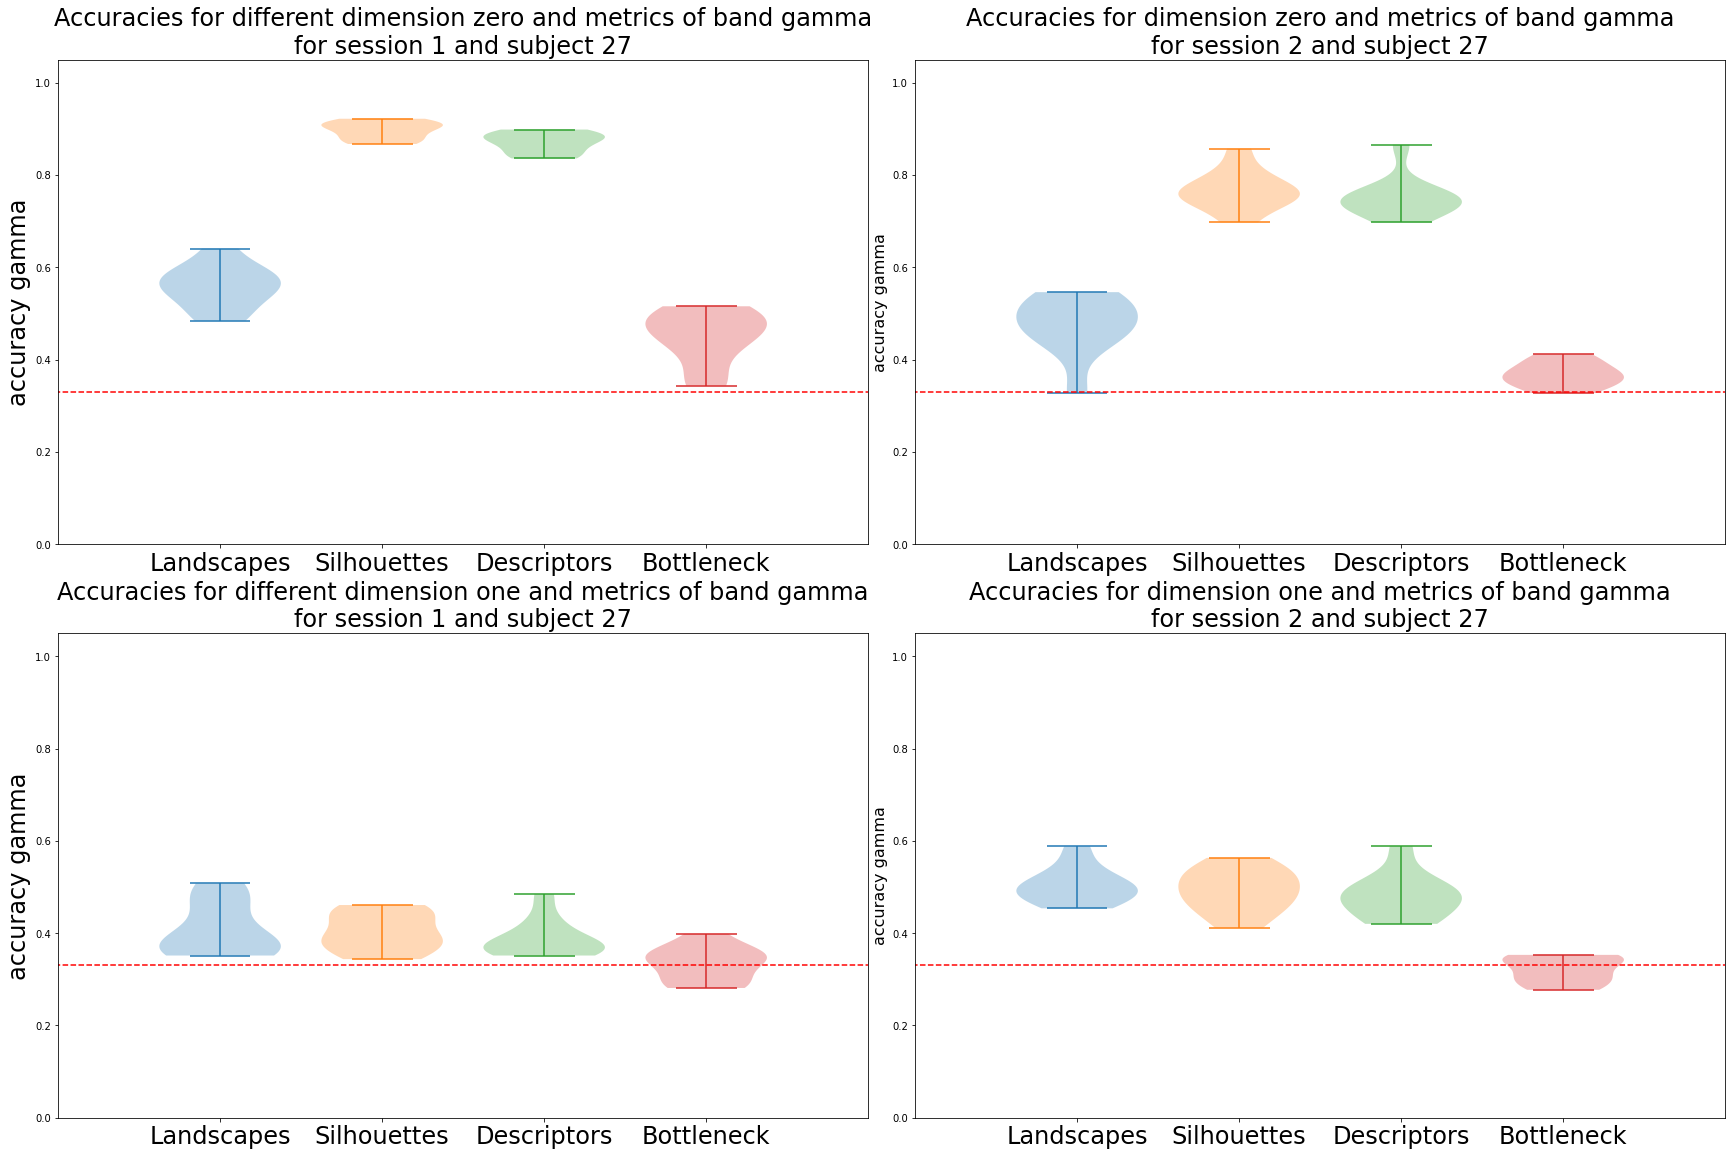

In [2]:
subj_n=0

for subj in subjects:
    for space in spaces:
        for b in bands:
            fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(24, 16))
            band=band_dic[b]
            temp1=np.load('results/intensities/subject_'+str(subj)+'/'+space+'/'+band+'/session'+str(1)+'/topological_clf/'+band+'perf_intensity.npy')
            temp2=np.load('results/intensities/subject_'+str(subj)+'/'+space+'/'+band+'/session'+str(2)+'/topological_clf/'+band+'perf_intensity.npy')
            plt.rcParams['xtick.labelsize']=24
            for i_dim in range(2): 
        # the chance level is defined as the trivial classifier that predicts the label with more occurrences 
                
                chance_level=0.33
                axes[i_dim][0].violinplot(temp1[i_dim,0,:],positions=[-0.2],widths=[0.3])
                axes[i_dim][0].violinplot(temp1[i_dim,1,:],positions=[0.2],widths=[0.3])
                axes[i_dim][0].violinplot(temp1[i_dim,2,:],positions=[0.6],widths=[0.3])
                axes[i_dim][0].violinplot(temp1[i_dim,3,:],positions=[1],widths=[0.3])

                axes[i_dim][0].plot([-1,2],[chance_level]*2,'--r')
                axes[i_dim][0].axis(xmin=-0.6,xmax=1.4,ymin=0,ymax=1.05)
                axes[i_dim][0].set_ylabel('accuracy '+band,fontsize=24)
                axes[i_dim][0].set_title('Accuracies for different dimension '+dimensions[i_dim]+' and metrics of band '+band+'\nfor session 1 and subject '+str(subj),fontsize=24)
                plt.setp(axes, xticks=[-0.2, 0.2, 0.6,1], xticklabels=feat_vect_names,yticks=[0, 0.2,0.4, 0.6,0.8,1])
            
                
                axes[i_dim][1].violinplot(temp2[i_dim,0,:],positions=[-0.2],widths=[0.3])
                axes[i_dim][1].violinplot(temp2[i_dim,1,:],positions=[0.2],widths=[0.3])
                axes[i_dim][1].violinplot(temp2[i_dim,2,:],positions=[0.6],widths=[0.3])
                axes[i_dim][1].violinplot(temp2[i_dim,3,:],positions=[1],widths=[0.3])

                axes[i_dim][1].plot([-1,2],[chance_level]*2,'--r')
                axes[i_dim][1].axis(xmin=-0.6,xmax=1.4,ymin=0,ymax=1.05)
                axes[i_dim][1].set_ylabel('accuracy '+band,fontsize=16)
                axes[i_dim][1].set_title('Accuracies for dimension '+dimensions[i_dim]+' and metrics of band '+band+'\nfor session 2 and subject '+str(subj),fontsize=24)
                plt.setp(axes, xticks=[-0.2, 0.2, 0.6,1], xticklabels=feat_vect_names,yticks=[0, 0.2,0.4, 0.6,0.8,1])
            plt.rcParams['xtick.labelsize']=24
            fig.tight_layout(pad=0.5)             
            plt.savefig('results/'+space+band+str(subj)+'.jpg')